# Group Project 3

## Initial

### Setup

In [1]:
import numpy as np
import gurobipy as gp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Vars

In [2]:
time_limit = 3600
random_state = 42

### Data Loading

In [3]:
train_data = pd.read_csv('training_data.csv')
test_data = pd.read_csv('test_data.csv')

X_train = train_data.drop(columns=['y'])
Y_train = train_data['y']

X_test = test_data.drop(columns=['y'])
Y_test = test_data['y']

In [4]:
train_data.head()

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
0,8.536145,-1.535413,0.718888,-2.099149,-0.442842,-0.598978,-1.642574,0.207755,0.760642,0.575874,...,0.361866,1.793098,-0.631287,-0.061751,0.511049,0.488754,-0.612772,-0.471045,-1.139781,-0.260773
1,4.808344,-1.734609,0.551981,-2.147673,-1.552944,1.514910,-1.143972,0.737594,1.321243,-0.261684,...,-0.677985,-0.165679,0.065405,0.137162,1.258197,-0.120834,-1.564834,-0.242565,-0.001827,1.187453
2,-1.530427,0.097257,0.107634,-0.194222,0.335454,-0.408199,0.133265,0.706179,0.394971,-0.437116,...,1.108801,0.333791,0.282055,-1.086294,-0.115354,0.257857,-0.088838,-0.751231,1.450609,0.290593
3,-0.428243,-0.067702,0.557836,0.700848,-1.121376,1.722274,0.613525,0.700909,-0.417976,1.069749,...,0.692511,-0.350990,0.624558,0.434520,-0.367409,-1.144681,-0.136524,-0.557214,0.416303,0.484495
4,0.566694,0.488729,0.211483,0.568389,0.646837,0.163868,-0.002152,0.125137,0.493571,1.705451,...,-0.000605,1.075280,0.182281,-1.138458,0.106092,0.544640,-0.383487,-0.425773,2.667647,-0.050748


In [5]:
test_data.head()

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
0,7.107949,-2.047008,0.260132,-0.785152,0.384576,-0.137613,-0.364566,-1.941253,-0.108180,-0.339223,...,-0.522194,1.861897,0.124511,1.144071,0.128179,-0.467972,-1.085601,0.659670,0.514719,0.806656
1,5.796272,-1.354328,-1.289884,1.321533,-0.091165,-1.021874,0.686778,0.089737,-0.398371,-0.261740,...,-0.502578,0.584476,0.680703,0.046788,0.569681,-1.099062,-0.069656,0.709273,-0.848665,0.996168
2,1.598651,0.502205,1.062887,1.460733,-1.506403,0.721664,0.528921,-0.699541,-0.270331,-2.544812,...,-0.125195,-1.292924,0.411785,-0.164210,-2.407403,-1.132500,0.452923,-0.945541,0.126523,-0.972075
3,2.532953,0.222381,-0.960747,-0.113762,1.935927,0.969387,-1.641403,0.026647,0.747138,-1.571784,...,-0.546915,-0.192517,0.603420,-0.277331,-1.451419,0.220775,0.474954,-0.160109,0.188047,-1.711229
4,0.590685,1.209949,1.586874,-0.694784,-0.226370,-0.152108,0.772356,-0.573741,-0.992492,-0.646661,...,-0.982236,-1.407777,0.094211,0.159960,-0.901612,-1.653122,0.393518,0.702539,0.552663,-0.773646


In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
X_train_scaled

array([[-1.33860966,  0.76366257, -1.84754192, ..., -0.57469639,
        -1.14987189, -0.36830564],
       [-1.52274113,  0.57958191, -1.8938478 , ..., -0.30530021,
        -0.00882268,  1.4667512 ],
       [ 0.17058258,  0.08951296, -0.02970293, ..., -0.90505771,
         1.44756333,  0.33033416],
       ...,
       [ 0.16501791,  0.49324308,  0.20510233, ..., -0.11855822,
        -0.20767807,  1.0274868 ],
       [-1.21991165,  0.534258  , -1.82696347, ..., -0.08090472,
         0.53824923,  0.30931643],
       [-1.7306285 ,  0.27049681, -0.3934137 , ...,  2.40107183,
         0.02666321, -1.55648789]])

In [8]:
X_test_scaled

array([[-1.81151336,  0.25770216, -0.59361665, ...,  0.75850603,
         0.50912782,  0.98424044],
       [-1.17121987, -1.45180623,  1.41675634, ...,  0.81699161,
        -0.85796451,  1.22437281],
       [ 0.54490494,  1.14305832,  1.54959328, ..., -1.13416451,
         0.11987639, -1.26960128],
       ...,
       [-0.01849191,  0.31786641, -0.41659135, ...,  0.87460129,
         1.17453263, -0.21857249],
       [-0.89615015, -1.58225969,  0.39202328, ...,  0.04518235,
         0.71928446,  0.12268935],
       [-1.14667306,  0.6121036 , -0.53201203, ...,  1.90000125,
         1.30008977, -0.25025632]])

## Question 4: Lasso

### CV for Best Lambda

In [9]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

In [15]:
cv_folds = 10

lasso = LassoCV(cv = cv_folds, random_state = random_state)
lasso.fit(X_train_scaled, Y_train)

print(f'Lasso Alpha: {lasso.alpha_:.3f}')

Lasso Alpha: 0.085


### Fitting Lasso using Best Lambda on Train/Test

In [64]:
def Lasso_SSE(X_scaled, Y):
    model = Lasso(alpha = lasso.alpha_)
    model.fit(X_train_scaled, Y_train)
    Y_pred = model.predict(X_scaled)

    sse = np.sum((Y - Y_pred) ** 2)

    return model, Y_pred, sse

In [66]:
lasso_train_model, lasso_Y_train_pred, lasso_train_sse = Lasso_SSE(X_train_scaled, Y_train)
lasso_test_model, lasso_Y_test_pred, lasso_test_sse = Lasso_SSE(X_test_scaled, Y_test)

print(f'SSE on the Train set: {lasso_train_sse:.3f}')
print(f'SSE on the Test set: {lasso_test_sse:.3f}')

SSE on the Train set: 596.611
SSE on the Test set: 117.833


### Non-Zero Features

In [53]:
# Get non-zero Lasso features
non_zero_features = np.where(lasso_test_model.coef_ != 0)[0]

# Print the non-zero features
print(f"Number of Non-zero Lasso features: {len(non_zero_features)}\n")
print(f"Non-zero Lasso features:")
for feature_index in non_zero_features:
    print(f"Feature {feature_index}: {X_train.columns[feature_index]}")

Number of Non-zero Lasso features: 18

Non-zero Lasso features:
Feature 8: X9
Feature 10: X11
Feature 14: X15
Feature 15: X16
Feature 21: X22
Feature 22: X23
Feature 23: X24
Feature 25: X26
Feature 28: X29
Feature 32: X33
Feature 33: X34
Feature 34: X35
Feature 38: X39
Feature 43: X44
Feature 44: X45
Feature 45: X46
Feature 46: X47
Feature 47: X48


### Actual vs Lasso Predicted Plot

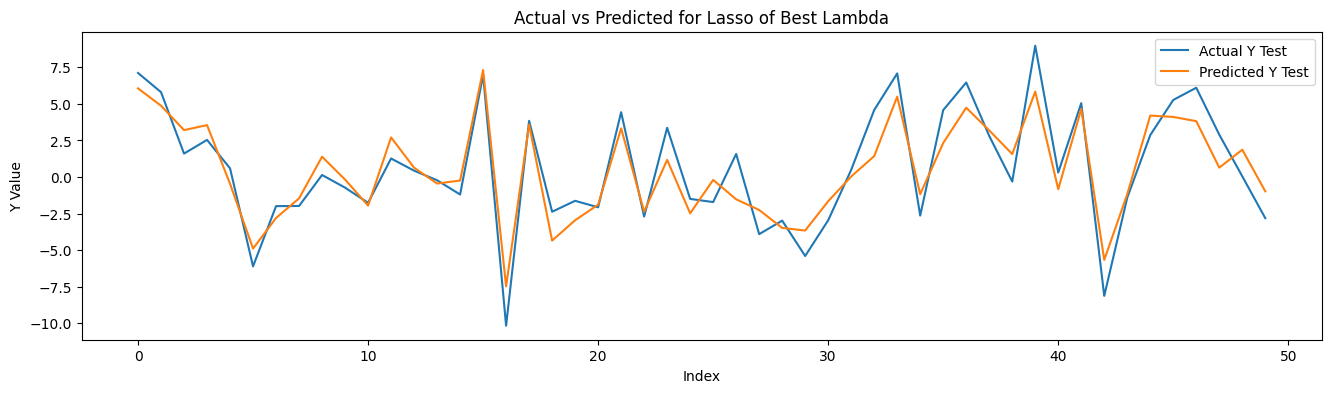

In [54]:
pred_data = pd.DataFrame({'y_test': Y_test, 'pred_test': lasso_Y_test_pred})

pred_data.sort_index(inplace=True)

pred_data.plot(
    y=['y_test', 'pred_test'],
    kind='line',
    figsize=(16, 4)
)

plt.title('Actual vs Predicted for Lasso of Best Lambda')
plt.ylabel('Y Value')
plt.xlabel('Index')
plt.legend(['Actual Y Test', 'Predicted Y Test'])

plt.show()

## Question 2: MIQP

### CV for Best K

In [13]:
# Initializing variables
n = len(X_train)
m = X_train.shape[1]
print(f'n: {n}\nm: {m}')

# Creating list of k values to iterate over
k_list = list(range(5, m + 1, 5))
# Number of CV folds
n_folds = 10
# Big-M value
M = 1000
# Dict to store average errors at each K value
k_error = {}

# Initialize an empty list to store dictionaries with the information
cross_val_data = []

n: 250
m: 50


In [240]:
for k in k_list:
    print(f'K Value: {k}')

    k_total_sse = 0
    
    for fold_num in range(n_folds):
        val_ind = np.random.choice(n, size = int(n/n_folds), replace = False)
        train_ind = np.setdiff1d(np.arange(n), val_ind)

        X_train_fold, X_val_fold = X_train.iloc[train_ind,:], X_train.iloc[val_ind,:]
        y_train_fold, y_val_fold = Y_train[train_ind], Y_train[val_ind]

        qpModel = gp.Model()

        # Define decision and selection variables
        betas = qpModel.addMVar(m + 1, lb = -np.inf)
        zvars = qpModel.addMVar(m, vtype = 'B')

        # Define Objective
        qpModel.setObjective(
            gp.quicksum(
                (betas[0] + gp.quicksum(betas[j+1]*X_train_fold.iloc[i, j] for j in range(m)) - y_train_fold.iloc[i]) 
                * (betas[0] + gp.quicksum(betas[j+1]*X_train_fold.iloc[i, j] for j in range(m)) - y_train_fold.iloc[i])
                for i in range(len(X_train_fold))
            )
        )

        # Constraint for selecting <= k variables
        con1 = qpModel.addConstr(gp.quicksum(zvars[j] for j in range(m)) <= k)
        # Big-M consraint
        con2 = qpModel.addConstrs(betas[j+1] <= M * zvars[j] for j in range(m))
        con3 = qpModel.addConstrs(betas[j+1] >= -M * zvars[j] for j in range(m))

        # Solve the model with fixed time limit
        qpModel.Params.OutputFlag = 0
        qpModel.setParam('TimeLimit', time_limit)
        qpModel.optimize()
        
        # Error from fold data
        validation_error = 0
        opt_beta = list(betas.x)
        validation_error = sum(
            (opt_beta[0] + sum(opt_beta[j+1] * X_val_fold.iloc[i, j] for j in range(m)) - y_val_fold.iloc[i])**2
            for i in range(X_val_fold.shape[0])
        )
        
        print(f'Fold Num {fold_num+1} - Validation Error: {validation_error:.3f}')
        
        k_total_sse += validation_error
        
        # Append the fold data to the list
        fold_data = {
            'k': k,
            'fold_num': fold_num+1,
            'validation_error': validation_error,
            'betas': betas.x
        }
        cross_val_data.append(fold_data)
    
    print(f"Total SSE on Validation Data: {(k_total_sse/n_folds):.3f}\n") 
    k_error[k] = k_total_sse/n_folds

# Create a DataFrame from the list of dictionaries
result_df = pd.DataFrame(cross_val_data)
result_df.to_csv(r'.\cross_val_logs.csv', index=False)

K Value: 5
Fold Num 1 - Validation Error: 89.191
Fold Num 2 - Validation Error: 95.313
Fold Num 3 - Validation Error: 47.727
Fold Num 4 - Validation Error: 77.865
Fold Num 5 - Validation Error: 118.039
Fold Num 6 - Validation Error: 111.258
Fold Num 7 - Validation Error: 68.358
Fold Num 8 - Validation Error: 108.352
Fold Num 9 - Validation Error: 167.810
Fold Num 10 - Validation Error: 94.721
Total SSE on Validation Data: 97.864

K Value: 10
Fold Num 1 - Validation Error: 77.373
Fold Num 2 - Validation Error: 69.673
Fold Num 3 - Validation Error: 93.165
Fold Num 4 - Validation Error: 46.649
Fold Num 5 - Validation Error: 75.033
Fold Num 6 - Validation Error: 59.497
Fold Num 7 - Validation Error: 103.559
Fold Num 8 - Validation Error: 61.901
Fold Num 9 - Validation Error: 30.385
Fold Num 10 - Validation Error: 87.515
Total SSE on Validation Data: 70.475

K Value: 15
Fold Num 1 - Validation Error: 59.822
Fold Num 2 - Validation Error: 125.804
Fold Num 3 - Validation Error: 66.329
Fold Nu

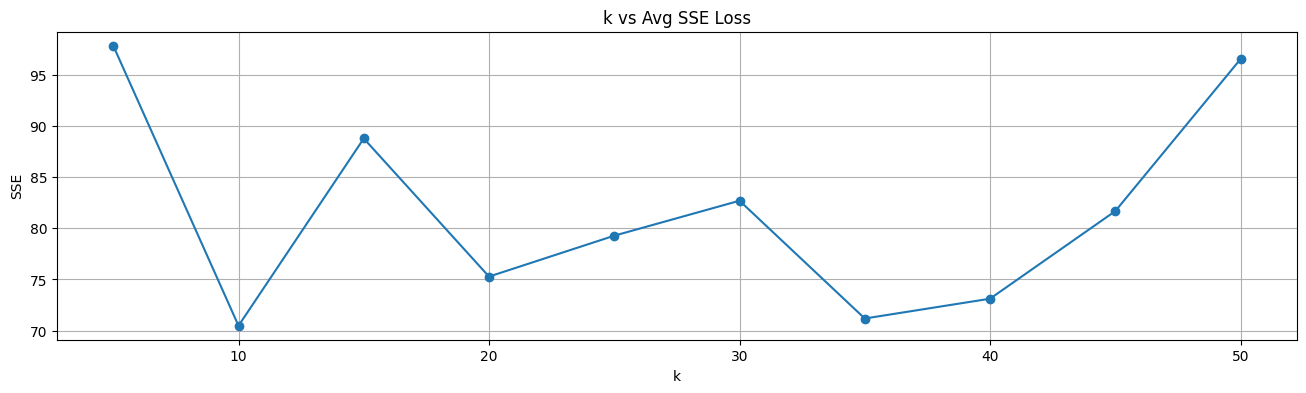

In [322]:
k_values = list(k_error.keys())
sse_values = list(k_error.values())

plt.figure(figsize=(16, 4))
plt.plot(k_values, sse_values, marker='o', linestyle='-')
plt.title('k vs Avg SSE Loss')
plt.xlabel('k')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

### Fitting MIQP using Best K on Train/Test

In [10]:
min_k = 10
print(f'min_k: {min_k}')

min_k: 10


In [20]:
def SSE(X, Y):
    qpModel = gp.Model()
    betas = qpModel.addMVar(m + 1, lb=-np.inf)
    zvars = qpModel.addMVar(m, vtype = 'B')

    # Define Objective
    qpModel.setObjective(
        gp.quicksum(
            (betas[0] + gp.quicksum(betas[j+1]*X.iloc[i, j] for j in range(m)) - Y.iloc[i]) 
            * (betas[0] + gp.quicksum(betas[j+1]*X.iloc[i, j] for j in range(m)) - Y.iloc[i])
            for i in range(len(X_train))
        )
    )

    con1 = qpModel.addConstr(gp.quicksum(zvars[j] for j in range(m)) <= min_k )
    con2 = qpModel.addConstrs(betas[j+1] <= M*zvars[j] for j in range(m))
    con3 = qpModel.addConstrs(betas[j+1] >= -M*zvars[j] for j in range(m))

    qpModel.Params.OutputFlag = 0
    qpModel.setParam('TimeLimit', time_limit)
    qpModel.optimize()

    # Error from fold data
    y_pred = []
    opt_beta = list(betas.x)
    validation_error = 0
    for i in range(len(X)):
        inner_sum = sum(opt_beta[j + 1] * X.iloc[i, j] for j in range(m))
        validation_error += (Y.iloc[i] - (opt_beta[0] + inner_sum))*(Y.iloc[i] - (opt_beta[0] + inner_sum))
        pred = inner_sum + opt_beta[0]
        y_pred.append(pred)

    return qpModel, y_pred, validation_error, zvars, betas

In [21]:
miqp_train_model, miqp_Y_train_pred, miqp_train_sse, miqp_train_zvars, miqp_train_betas = SSE(X_train, Y_train)
miqp_test_model, miqp_Y_test_pred, miqp_test_sse, miqp_test_zvars, miqp_test_betas = SSE(X_test, Y_test)

print(f"SSE on Train Data for Best K = {min_k}: {miqp_train_sse:.3f}") 
print(f"SSE on Test Data for Best K = {min_k}: {miqp_test_sse:.3f}") 

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\nikna\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\nikna\AppData\Local\Temp\ipykernel_10960\1440970761.py", line 2, in <module>
    miqp_test_model, miqp_Y_test_pred, miqp_test_sse, miqp_test_zvars, miqp_test_betas = SSE(X_test, Y_test)
                                                                                         ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nikna\AppData\Local\Temp\ipykernel_10960\2165759568.py", line 8, in SSE
    gp.quicksum(
  File "src\gurobipy\gurobi.pxi", line 3706, in gurobipy.quicksum
  File "C:\Users\nikna\AppData\Local\Temp\ipykernel_10960\2165759568.py", line 9, in <genexpr>
    (betas[0] + gp.quicksum(betas[j+1]*X.iloc[i, j] for j in range(m)) - Y.iloc[i])
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "src\gurobipy\gurobi.pxi", line 3706, in gu

### Non-Zero Features

In [321]:
opt_zvars = ([int(v.x) for v in miqp_train_zvars])
opt_betas = ([float(v.x) for v in miqp_train_betas])[1:]

non_zero_features = list(filter(lambda x: x != 0, opt_zvars))
print(f"Number of Non-zero MIQP features: {len(non_zero_features)}\n")

Number of Non-zero MIQP features: 9



### Actual vs MIQP Predicted Plot

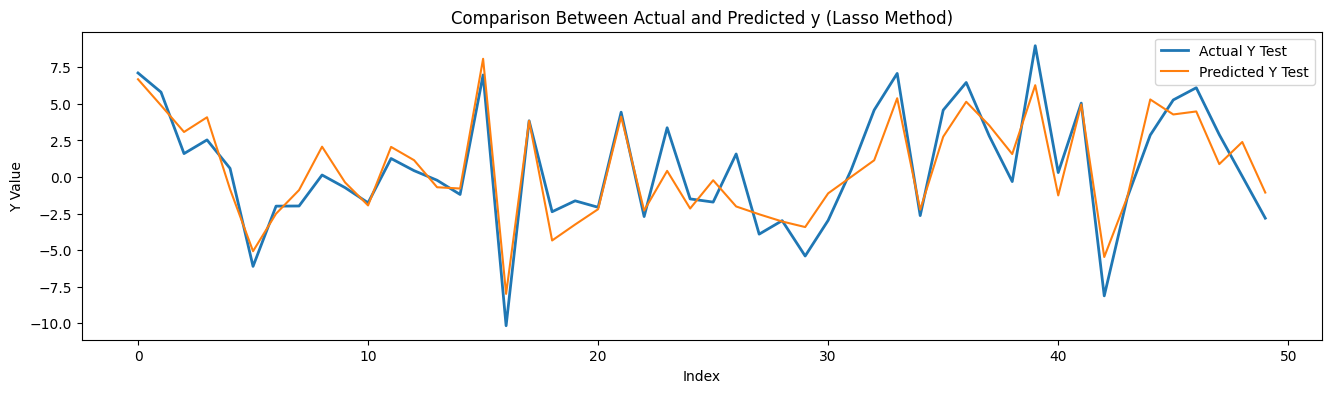

In [306]:
plt.figure(figsize=(16, 4))

plt.plot(Y_test.index, Y_test, label='Actual Y Test', linewidth=2)
plt.plot(Y_test.index, miqp_Y_test_pred, label='Predicted Y Test')

plt.xlabel('Index')
plt.ylabel('Y Value')
plt.title('Comparison Between Actual and Predicted y (Lasso Method)')
plt.legend()
plt.show()

## Lasso vs MIQP

### Test vs Train Plot

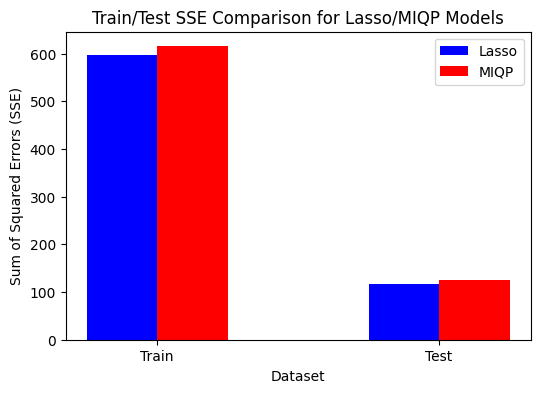

In [307]:
lasso_values = [lasso_train_sse, lasso_test_sse]
miqp_values = [miqp_train_sse, miqp_test_sse]
labels = ['Train', 'Test']

# Create bar plot
plt.figure(figsize=(6, 4))
bar_width = 0.25

# Bar positions
lasso_positions = range(len(lasso_values))
miqp_positions = [pos + bar_width for pos in lasso_positions]

# Plotting the bars
plt.bar(lasso_positions, lasso_values, width=bar_width, label='Lasso', color='blue')
plt.bar(miqp_positions, miqp_values, width=bar_width, label='MIQP', color='red')

# Adding labels and title
plt.xlabel('Dataset')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Train/Test SSE Comparison for Lasso/MIQP Models')

# Set x-axis ticks and labels
plt.xticks([pos + bar_width/2 for pos in lasso_positions], labels)

# Show legend
plt.legend()

# Show the plot
plt.show()

### Beta Comparisson Plot

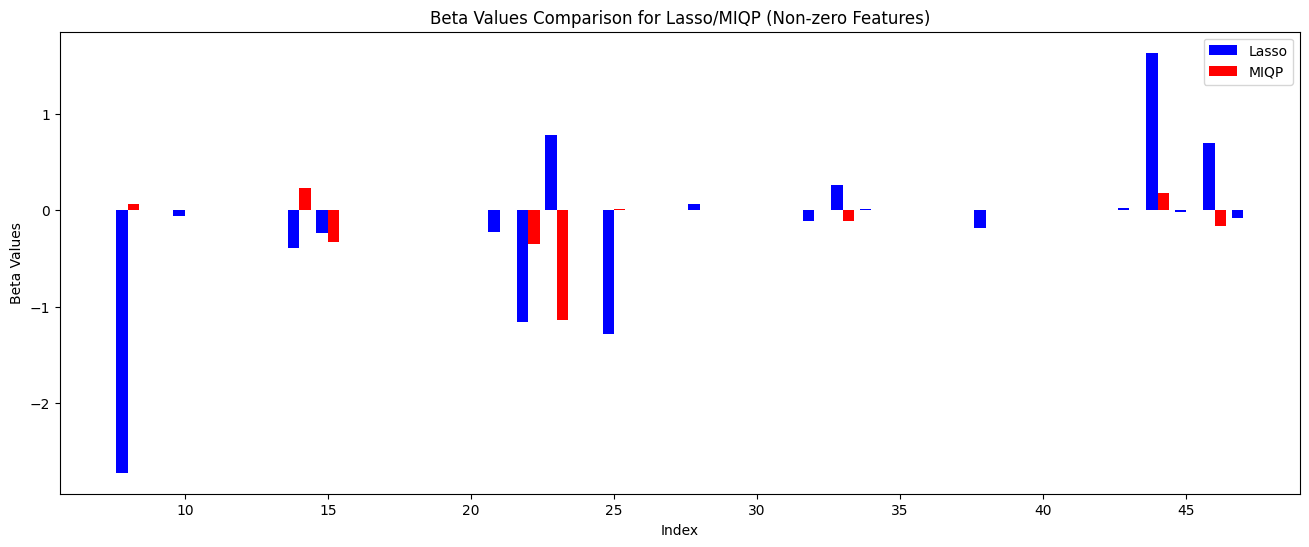

In [317]:
# Get non-zero features and corresponding beta values from Lasso
lasso_non_zero_features = np.where(lasso_test_model.coef_ != 0)[0]
lasso_non_zero_betas = lasso_test_model.coef_[lasso_non_zero_features]

# Get non-zero features and corresponding beta values from MIQP
miqp_non_zero_features = np.nonzero(opt_zvars)[0]
miqp_non_zero_betas = [opt_beta[i] for i in miqp_non_zero_features]

plt.figure(figsize=(16, 6))

plt.bar(lasso_non_zero_features - 0.2, lasso_non_zero_betas, width=0.4, color='blue', label='Lasso')
plt.bar(miqp_non_zero_features + 0.2, miqp_non_zero_betas, width=0.4, color='red', label='MIQP')

plt.xlabel('Index')
plt.ylabel('Beta Values')
plt.title('Beta Values Comparison for Lasso/MIQP (Non-zero Features)')
plt.legend()

plt.show()

### SSE Comparison Plot

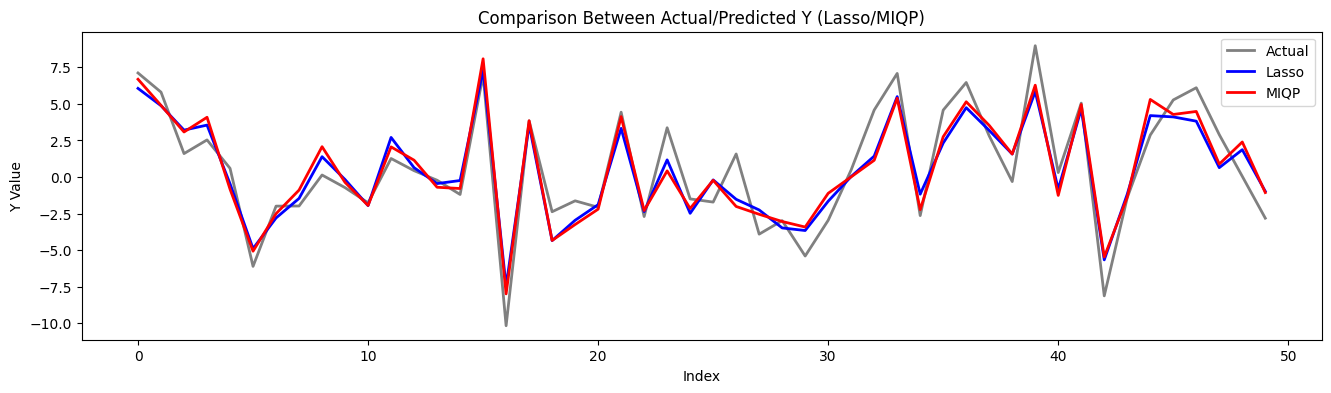

In [308]:
# Plotting Comparison Between Actual and Predicted y (Lasso Method)
plt.figure(figsize=(16, 4))
plt.plot(Y_test.index, Y_test, label='Actual', linewidth=2, color="gray")
plt.plot(Y_test.index, Y_test_pred, label='Lasso', linewidth=2, color="blue")
plt.plot(Y_test.index, miqp_Y_test_pred, label='MIQP', linewidth=2, color="red")

plt.xlabel('Index')
plt.ylabel('Y Value')
plt.title('Comparison Between Actual/Predicted Y (Lasso/MIQP)')
plt.legend()
plt.show()
